# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [ ]:
# stundent details example: John S. 9812
#                       student details 1: Lee A. 7402
# (if exists)           student details 2: 
# (if exists)           student details 3: 
# (if exists)           student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT
Goal: EDA 
Propmpt1:"give me intuitive EDA visualizations for the dataset that clearly show class distribution and feature differences between classes."

AI agent name 2: ChatGPT
Goal: visualizations for scaling  
Propmpt1:"how can I demonstrate the effect of scaling? I want to show a before and after."
    
Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
Problem type & dataset:
- Task: Multiclass classification (3 classes) – predict the wine class based on 13 chemical features.  
- Dataset: UCI Wine dataset split into `wine_train.csv` and `wine_test.csv`.  
- Target column: `class` (values: `class_0`, `class_1`, `class_2`)

</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from matplotlib import pyplot as plt

In [11]:
# Load
train_df = pd.read_csv('wine_train.csv')
test_df  = pd.read_csv('wine_test.csv')

print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)

display(train_df.head())
display(test_df.head())


Train shape: (142, 14)
Test shape : (36, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


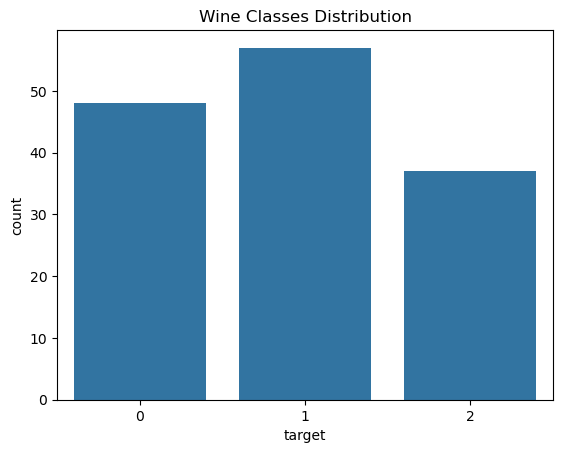

Purpose: Check if the dataset is balanced across the three wine classes or if one class dominates.



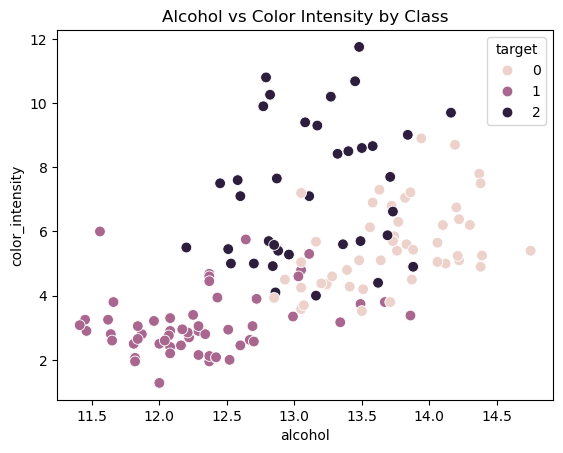

Purpose: Visualize whether the combination of Alcohol and Color Intensity helps separate the wine classes.



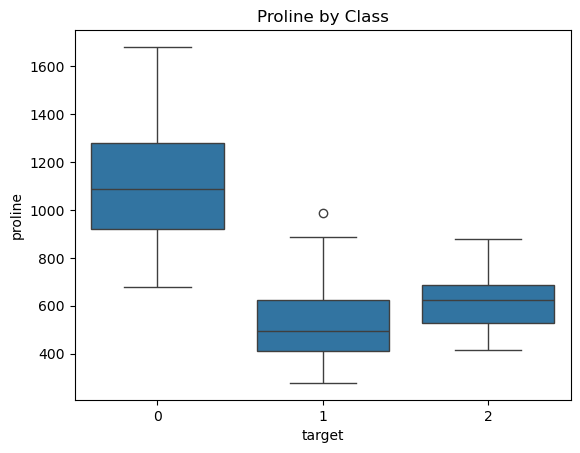

Purpose: Show how Proline levels differ across classes, highlighting its importance as a discriminative feature.



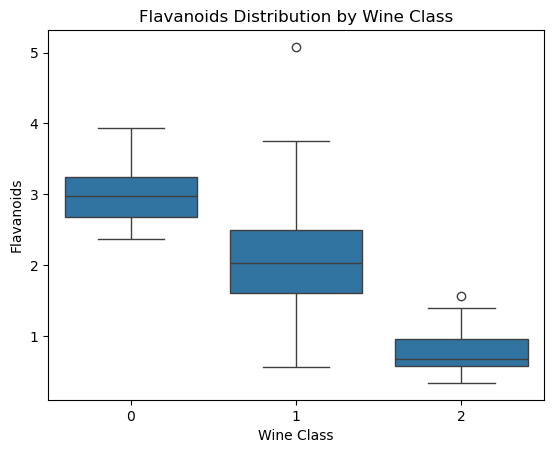

Purpose: Demonstrate that Flavanoids strongly distinguish the classes – high in class 0, medium in class 1, and low in class 2.



In [12]:

# 1) Class distribution
sns.countplot(data=train_df, x='target')
plt.title("Wine Classes Distribution")
plt.show()
print("Purpose: Check if the dataset is balanced across the three wine classes or if one class dominates.\n")

# 2) Scatter plot of Alcohol vs Color Intensity by class
sns.scatterplot(data=train_df, x="alcohol", y="color_intensity", hue='target', s=60)
plt.title("Alcohol vs Color Intensity by Class")
plt.show()
print("Purpose: Visualize whether the combination of Alcohol and Color Intensity helps separate the wine classes.\n")

# 3) Boxplot of Proline by class
sns.boxplot(data=train_df, x='target', y="proline")
plt.title("Proline by Class")
plt.show()
print("Purpose: Show how Proline levels differ across classes, highlighting its importance as a discriminative feature.\n")

# Boxplot of Flavanoids by class
sns.boxplot(data=train_df, x="target", y="flavanoids")
plt.title("Flavanoids Distribution by Wine Class")
plt.xlabel("Wine Class")
plt.ylabel("Flavanoids")
plt.show()
print("Purpose: Demonstrate that Flavanoids strongly distinguish the classes – high in class 0, medium in class 1, and low in class 2.\n")


## Part 3 - Experiments
You could add as many code cells as needed

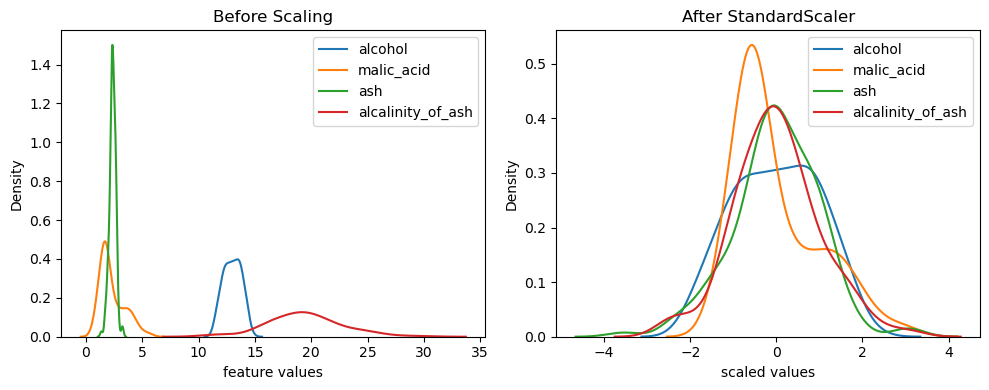

Purpose: Illustrate how StandardScaler transforms features.



In [13]:

X_train = train_df.drop(columns=['target'])
y_train = train_df['target']

X_test  = test_df.drop(columns=['target'])
y_test  = test_df['target']

X = train_df.drop(columns=["target"])
y = train_df["target"]
features = ["alcohol", "malic_acid", "ash","alcalinity_of_ash"]

# before scailing
X_before = X[features]

# after StandardScaler
scaler = StandardScaler()
X_after = scaler.fit_transform(X_before)
X_after = pd.DataFrame(X_after, columns=features)


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

ax1.set_title('Before Scaling')
ax1.set_xlabel('feature values')
for col in features:
    sns.kdeplot(X_before[col], ax=ax1, label=col)
ax1.legend()

ax2.set_title('After StandardScaler')
ax2.set_xlabel('scaled values')
for col in features:
    sns.kdeplot(X_after[col], ax=ax2, label=col)
ax2.legend()

plt.tight_layout()
plt.show()
print("Purpose: Illustrate how StandardScaler transforms features.\n")


In [20]:
# Pipeline for KNN (with scaling)
pipe_knn = Pipeline([("scaler", StandardScaler()),("clf", KNeighborsClassifier())])

# Pipeline for Decision Tree (no scaling needed)
pipe_dt = Pipeline([("clf", DecisionTreeClassifier(random_state=42))])

# Define parameter grids
param_grid_knn = {"clf__n_neighbors": [5, 7, 9, 10,11],"clf__weights": ["uniform", "distance"]}

param_grid_dt = {"clf__criterion": ["gini", "entropy"],"clf__max_depth": [None, 5, 10]}

# Grid search setup
scorer = make_scorer(f1_score, average="macro")

grids = [("KNN", pipe_knn, param_grid_knn),("DecisionTree", pipe_dt, param_grid_dt)]
best_models = {}
for name, pipe, grid in grids:
    gs = GridSearchCV(pipe, grid, scoring=scorer, cv=5, n_jobs=-1)
    gs.fit(X_train, y_train)
    print(f"{name} best CV f1_macro: {gs.best_score_:.4f}")
    print("Best params:", gs.best_params_)
    best_models[name] = {"estimator": gs.best_estimator_,"score": gs.best_score_}

best_model_name = max(best_models, key=lambda m: best_models[m]["score"])
best_model = best_models[best_model_name]["estimator"]

print("\nBest overall model:", best_model_name)
print("CV f1_macro:", best_models[best_model_name]["score"])


KNN best CV f1_macro: 0.9650
Best params: {'clf__n_neighbors': 9, 'clf__weights': 'distance'}
DecisionTree best CV f1_macro: 0.9458
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': None}

Best overall model: KNN
CV f1_macro: 0.9650439825052828


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [24]:
final_model = best_models[best_model_name]["estimator"]
final_model.fit(X, y)
print("Final model trained:", best_model_name)

Final model trained: KNN


## Part 5 - Apply on test and show model performance estimation

Test Macro F1: 0.9454

Classification Report:

              precision    recall  f1-score   support

           0     0.9167    1.0000    0.9565        11
           1     1.0000    0.8571    0.9231        14
           2     0.9167    1.0000    0.9565        11

    accuracy                         0.9444        36
   macro avg     0.9444    0.9524    0.9454        36
weighted avg     0.9491    0.9444    0.9435        36



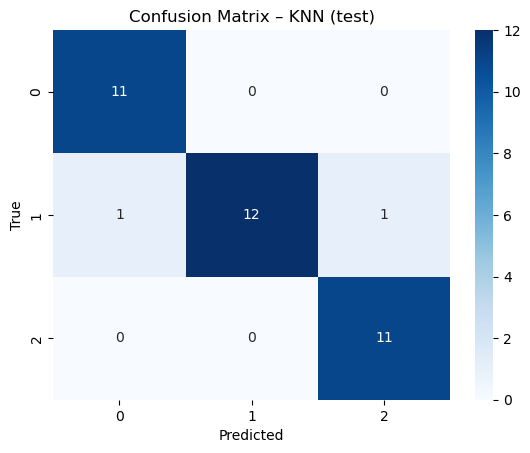

Purpose: Examine correlations between numerical features and detect strong relationships or redundancies.


First 5 predictions vs actual:
   y_true  y_pred
0       2       2
1       0       0
2       2       2
3       1       1
4       2       2




In [25]:

y_pred = best_model.predict(X_test)
# macro-F1
test_f1_macro = f1_score(y_test, y_pred, average="macro")
print(f"Test Macro F1: {test_f1_macro:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title(f"Confusion Matrix – {best_model_name} (test)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
print("Purpose: Examine correlations between numerical features and detect strong relationships or redundancies.\n")

preview = pd.DataFrame({"y_true": y_test.iloc[:5].values,"y_pred": y_pred[:5]})
print("\nFirst 5 predictions vs actual:")
print(preview)
print("\n")